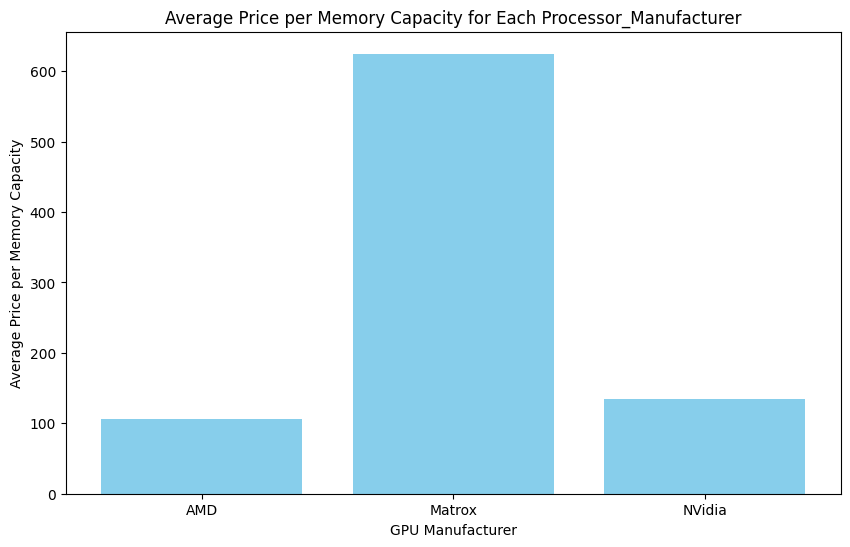

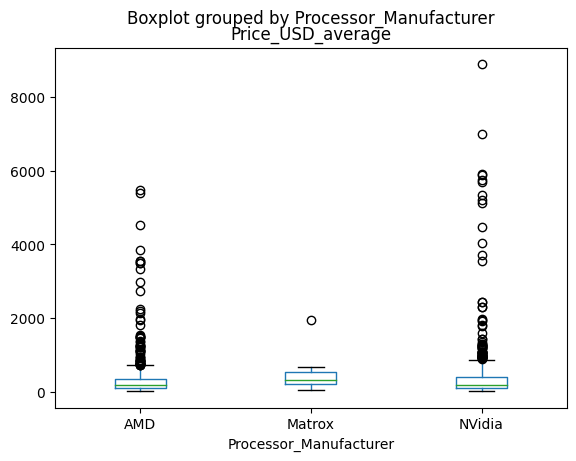

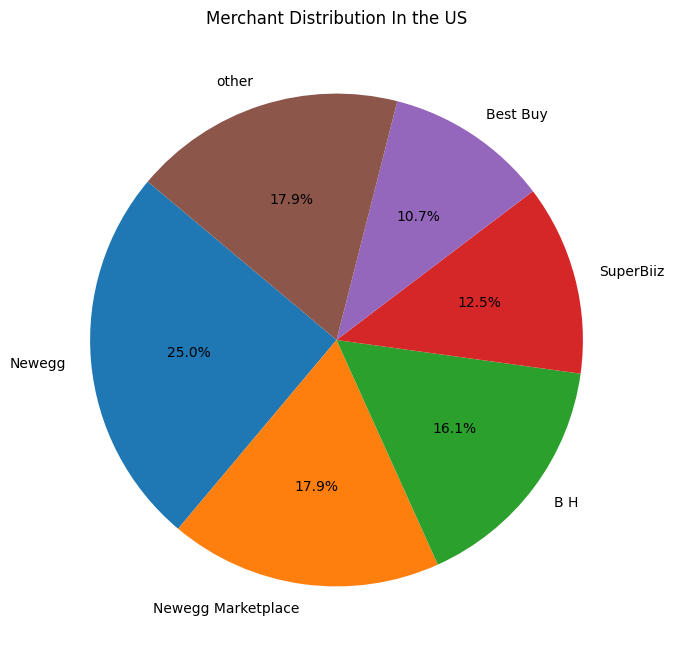

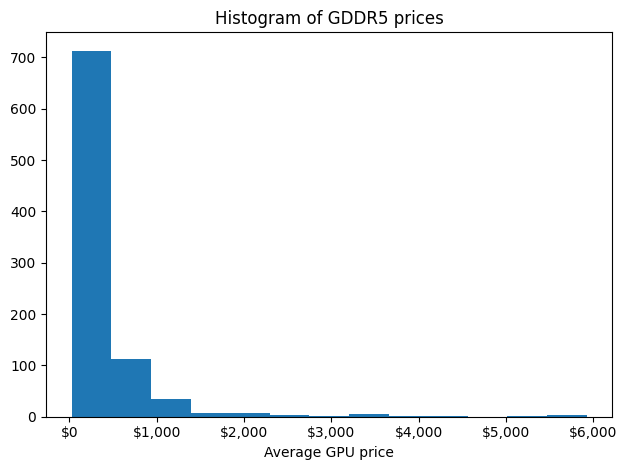

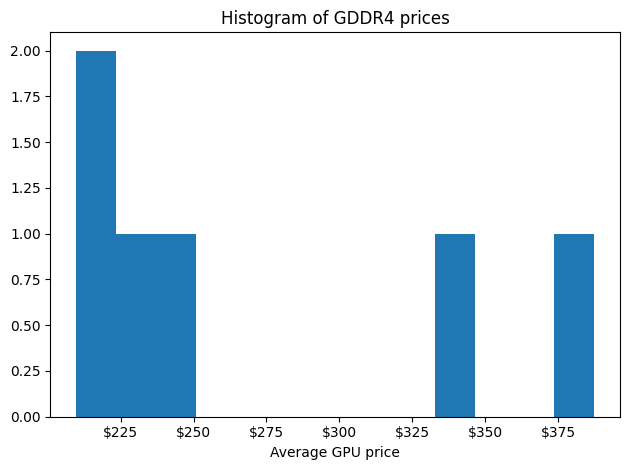

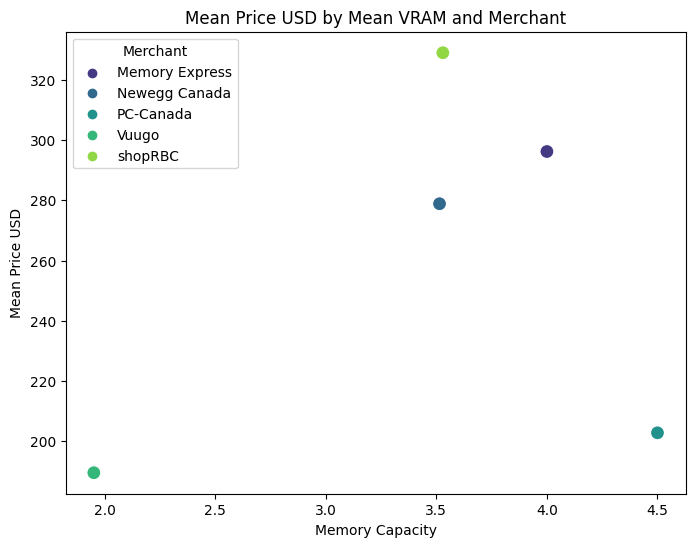

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

file_path = '/kaggle/input/ethereum-effect-pc-parts/FACT_GPU_PRICE.csv'
file_path2 = '/kaggle/input/ethereum-effect-pc-parts/DIM_GPU_PROD.csv'
file_path3= '/kaggle/input/ethereum-effect-pc-parts/DIM_REGION.csv'
file_path4 = '/kaggle/input/ethereum-effect-pc-parts/DIM_MERCHANT.csv'
df = pd.read_csv(file_path)
df1 = pd.read_csv(file_path2)
df2 = pd.read_csv(file_path3)
df3 = pd.read_csv(file_path4)
#groups ProdId values by price_usd and finds the value of each group and makes a dataset
average_prices = df.groupby('ProdId')['Price_USD'].mean().reset_index()
result_df = pd.merge(df, average_prices, on='ProdId', suffixes=('', '_average'))
result_df = result_df.drop_duplicates(subset='ProdId')
result_df = result_df.drop('Price_USD', axis=1).rename(columns={'price_average': 'Price_USD'})
#drops irrelevant columns

#merges and gets rid of the models that dont have a price with inner 
mdf = pd.merge(df1, result_df, left_on='Id', right_on='ProdId', how='inner')
#should print nvidea matrox and Amd.

ndf = pd.merge(mdf, df2, left_on = 'RegionId', right_on = 'Id', how = 'inner')
mpr = ndf.loc[ndf['Price_USD_average'].idxmax()]
ldf = pd.merge(ndf, df3, left_on = 'MerchantId', right_on = 'Id', how = 'inner')
#display(ldf.tail(2))
#unique_values = mdf['Processor_Manufacturer'].unique()
#print(unique_values)
#should print nvidea matrox and Amd.
#test to see if dataset is working


avg_price_per_memory = ldf.groupby('Processor_Manufacturer')['Price_USD_average'].sum() / ldf.groupby('Processor_Manufacturer')['Memory_Capacity'].sum()
avg_price_per_memory = avg_price_per_memory.reset_index(name='Price_USD_average')

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_memory['Processor_Manufacturer'], avg_price_per_memory['Price_USD_average'], color='skyblue')
plt.xlabel('GPU Manufacturer')
plt.ylabel('Average Price per Memory Capacity')
plt.title('Average Price per Memory Capacity for Each Processor_Manufacturer')
plt.show()
ldf.boxplot(by ='Processor_Manufacturer', column =['Price_USD_average'], grid = False)

#making a pie char
USFILT = ldf[ldf['Code'] == 'us']
#display(USFILT)
merGB = USFILT.groupby('Merchant')
merGB = USFILT.groupby('Merchant').size().reset_index(name='Count')
lowest_merchants = merGB.nlargest(5, 'Count')
other_merchants = merGB[~merGB['Merchant'].isin(lowest_merchants['Merchant'])]
other_count = other_merchants['Count'].sum()
other_row = pd.DataFrame({'Merchant': ['other'], 'Count': [other_count]})
MerRe = pd.concat([lowest_merchants, other_row])
#display(MerRe)
plt.figure(figsize=(8, 8))
plt.pie(MerRe['Count'], labels=MerRe['Merchant'], autopct='%1.1f%%', startangle=140)
plt.title('Merchant Distribution In the US')
plt.show()

#making a histogram of DDR5 memory prices vs DDR4 memory prices
DD5 = ldf[ldf['Memory_Type'] == 'GDDR5']
DD4 = ldf[ldf['Memory_Type'] == 'GDDR4']


fig, ax = plt.subplots()
ax.hist(DD5["Price_USD_average"], bins=13)
ax.set_xlabel("Average GPU price")
ax.set_title('Histogram of GDDR5 prices')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
fig.tight_layout()
plt.show()


fig, ax = plt.subplots()
ax.hist(DD4["Price_USD_average"], bins=13)
ax.set_xlabel("Average GPU price")
ax.set_title('Histogram of GDDR4 prices')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
fig.tight_layout()
plt.show()



#making a scatterplot
nde = ldf[ldf['Code'] == 'ca']
test1 = nde['Price_USD_average'].mean()
nde = nde[['Merchant', 'Price_USD_average', 'Memory_Capacity']]
nde['Merchant'] = nde['Merchant'].replace({'Newegg Canada Marketplace': 'Newegg Canada'})
newlt = nde.groupby('Merchant')
disy = newlt.mean()
#display(disy)
#merDE = nde.groupby('Merchant')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Memory_Capacity', y='Price_USD_average', hue='Merchant', data=disy, palette='viridis', s=100)
plt.title('Mean Price USD by Mean VRAM and Merchant')
plt.xlabel('Memory Capacity')
plt.ylabel('Mean Price USD')
plt.legend(title='Merchant')
plt.show()




# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session